In [1]:
from ubibetter.models.compute_fraction  import compute_fraction
from ubibetter.utils.data.get_neigbours import get_neighbours
from ubibetter.models.compute_fraction import compute_fraction
from betbrain.manager.data_manager import data_manager

import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dm = data_manager(sport='Baseball')

In [3]:
data = dm.__get_data__()

In [4]:
data.head()

odds        \
                                                                   0     1   
MatchDate  HomeTeam          AwayTeam          bkmr                          
2008-09-10 Seattle Mariners  Texas Rangers     pinnacle_op_ha_  2.69  1.56   
2008-09-14 Houston Astros    Chicago Cubs      pinnacle_op_ha_  3.36  1.39   
2008-09-28 Chicago White Sox Cleveland Indians pinnacle_op_ha_  1.97  1.92   
           Milwaukee Brewers Chicago Cubs      pinnacle_op_ha_  2.11  1.81   
           New York Mets     Miami Marlins     pinnacle_op_ha_  2.04  1.88   

                                                                prob        \
                                                                   0     1   
MatchDate  HomeTeam          AwayTeam          bkmr                          
2008-09-10 Seattle Mariners  Texas Rangers     pinnacle_op_ha_  0.37  0.63   
2008-09-14 Houston Astros    Chicago Cubs      pinnacle_op_ha_  0.29  0.71   
2008-09-28 Chicago White Sox Cleveland Indians pinnacle_op_ha_  0.49  0.51   
           Milwaukee Brewers Chicago Cubs      pinnacle_op_ha_  0.46  0.54   
           New York Mets     Miami Marlins     pinnacle_op_ha_  0.48  0.52   

                                                                 book FTR  
                                                                           
MatchDate  HomeTeam          AwayTeam          bkmr                        
2008-09-10 Seattle Mariners  Texas Rangers     pinnacle_op_ha_  0.013   0  
2008-09-14 Houston Astros    Chicago Cubs      pinnacle_op_ha_  0.017   1  
2008-09-28 Chicago White Sox Cleveland Indians pinnacle_op_ha_  0.028   0  
           Milwaukee Brewers Chicago Cubs      pinnacle_op_ha_  0.026   1  
           New York Mets     Miami Marlins     pinnacle_op_ha_  0.022   1

In [5]:
train = data[data.index.get_level_values(0) < datetime(2017, 1, 1)]
test  = data[data.index.get_level_values(0) > datetime(2017, 1, 1)]

In [6]:
matrix = dm.ubibetter.get_matrix(train,[('prob', 0), ('prob', 1), 'book', 'FTR'])
matrix = matrix.stack().unstack(level=2)
matrix = matrix[matrix.sum(axis=1) > 250].stack().unstack(level=2).fillna(0)

/Users/Gabriele/Library/Mobile Documents/com~apple~CloudDocs/Kellify/Projects/ubipy/env/lib/python3.7/site-packages/pandas/core/generic.py:3947: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [7]:
matrix.head()

book                     0.048  0.018  0.047  0.046  0.020  0.044  0.014  \
(prob, 0) (prob, 1) FTR                                                    
0.32      0.68      0     98.0    0.0    0.0    0.0    0.0    0.0    0.0   
                    1    174.0    0.0    0.0    0.0    0.0    0.0    0.0   
0.34      0.66      0      0.0   97.0   97.0    0.0    0.0    0.0    0.0   
                    1      0.0  206.0  227.0    0.0    0.0    0.0    0.0   
0.35      0.65      0      0.0    0.0    0.0  166.0    0.0    0.0    0.0   

book                     0.045  0.013  0.015  ...  0.016  0.030  0.023  0.031  \
(prob, 0) (prob, 1) FTR                       ...                               
0.32      0.68      0      0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0   
                    1      0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0   
0.34      0.66      0      0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0   
                    1      0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0   
0.35      0.65      0      0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0   

book                     0.052  0.055  0.024  0.035  0.049  0.029  
(prob, 0) (prob, 1) FTR                                            
0.32      0.68      0      0.0    0.0    0.0    0.0    0.0    0.0  
                    1      0.0    0.0    0.0    0.0    0.0    0.0  
0.34      0.66      0      0.0    0.0    0.0    0.0    0.0    0.0  
                    1      0.0    0.0    0.0    0.0    0.0    0.0  
0.35      0.65      0      0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 38 columns]

In [8]:
test   = test.reset_index(level=3).set_index(['book','bkmr'], append=True)
vicini = test.prob.apply(get_neighbours, axis=1).rename('NN').to_frame()

probs  = vicini.apply(dm.ubibetter.__compute_probs__, axis=1, args=[matrix])
probs.columns = pd.MultiIndex.from_tuples([('KLFY', c) for c in probs.columns])

In [9]:
probs.head()

KLFY  \
                                                                      0   
MatchDate  HomeTeam       AwayTeam      book  bkmr                        
2017-02-24 Boston Red Sox New York Mets 0.063 10bet_op_ha_     0.000000   
                                        0.033 5dimes_op_ha_    0.000000   
                                        0.044 bet365_op_ha_    0.496011   
                                        0.048 bwin_op_ha_      0.490706   
                                        0.041 marathon_op_ha_  0.465330   

                                                                         
                                                                      1  
MatchDate  HomeTeam       AwayTeam      book  bkmr                       
2017-02-24 Boston Red Sox New York Mets 0.063 10bet_op_ha_     0.000000  
                                        0.033 5dimes_op_ha_    0.000000  
                                        0.044 bet365_op_ha_    0.503989  
                                        0.048 bwin_op_ha_      0.509294  
                                        0.041 marathon_op_ha_  0.534670

In [10]:
aux = pd.concat([test.odds.stack().rename('odd'), probs.KLFY.stack().rename('prob')], axis=1, join='inner')
aux = aux.reset_index(level=5).merge(test['FTR'], right_index=True, left_index=True)
aux = aux.reset_index(level=3, drop=True)
aux = aux.rename(columns={'level_5':'level_4'})

In [11]:
aux.head(6)

level_4   odd  \
MatchDate  HomeTeam       AwayTeam      bkmr                             
2017-02-24 Boston Red Sox New York Mets 5dimes_op_ha_          0  2.08   
                                        5dimes_op_ha_          1  1.81   
                                        marathon_op_ha_        1  1.80   
                                        marathon_op_ha_        0  2.06   
                                        bet365_op_ha_          0  2.10   
                                        bet365_op_ha_          1  1.76   

                                                             prob  FTR  
MatchDate  HomeTeam       AwayTeam      bkmr                            
2017-02-24 Boston Red Sox New York Mets 5dimes_op_ha_    0.000000    0  
                                        5dimes_op_ha_    0.000000    0  
                                        marathon_op_ha_  0.534670    0  
                                        marathon_op_ha_  0.465330    0  
                                        bet365_op_ha_    0.496011    0  
                                        bet365_op_ha_    0.503989    0

In [12]:
frac = aux.groupby(level=[0,1,2,3]).apply(compute_fraction).rename('frac').to_frame()
aux  = pd.concat([aux.set_index('level_4', append=True), frac.round(4)], axis=1).reset_index(level=4)

In [13]:
def perform_simulation(x):
    if x['level_4'] == x['FTR']:
        return (x['odd'] - 1) * x['frac']
    elif x['level_4'] != x['FTR']:
        return -x['frac']

In [14]:
aux['margin'] = aux.apply(perform_simulation, axis=1)

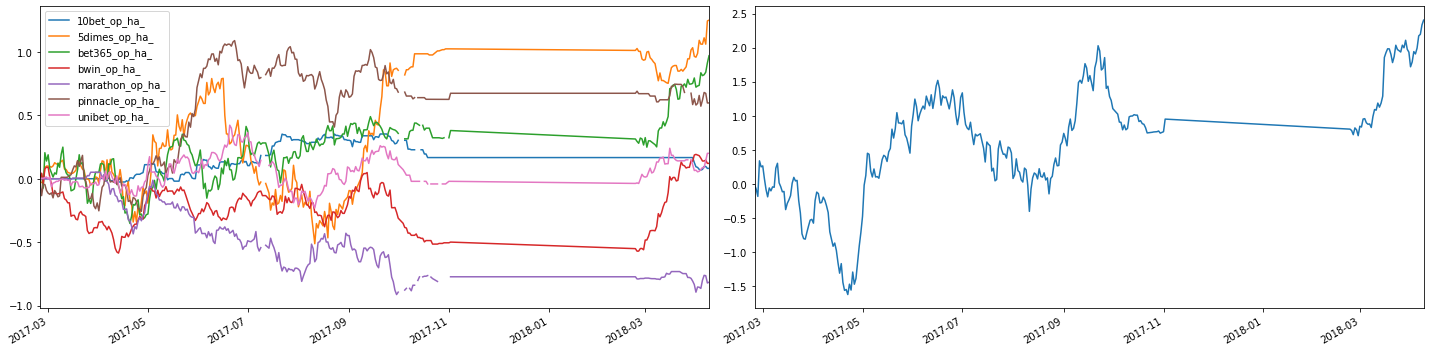

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
aux.margin.groupby(level=[0,3]).sum().unstack().cumsum().plot(ax=ax[0])
aux.margin.groupby(level=[0]).sum().cumsum().plot(ax=ax[1])
plt.tight_layout()

In [138]:
disp = aux[(aux.index.get_level_values(3) == 'pinnacle_op_ha_') & (aux.frac > 0)] 

In [139]:
teams = disp.groupby(level=1).mean().margin.sort_values()
teams = teams.iloc[-5:].index

In [140]:
disp = aux[(aux.index.get_level_values(3) == 'pinnacle_op_ha_') & (aux.frac > 0) & 
           ((aux.index.get_level_values(1).isin(teams)) | (aux.index.get_level_values(2).isin(teams)))] 

In [141]:
disp.head()

level_4  \
2017-02-25 Los Angeles Dodgers Chicago White Sox   pinnacle_op_ha_        0   
2017-02-26 Oakland Athletics   Los Angeles Angels  pinnacle_op_ha_        0   
2017-02-27 Los Angeles Dodgers Colorado Rockies    pinnacle_op_ha_        0   
2017-02-28 Colorado Rockies    Los Angeles Dodgers pinnacle_op_ha_        0   
2017-03-01 Cleveland Indians   Seattle Mariners    pinnacle_op_ha_        0   

                                                                     odd  \
2017-02-25 Los Angeles Dodgers Chicago White Sox   pinnacle_op_ha_  2.29   
2017-02-26 Oakland Athletics   Los Angeles Angels  pinnacle_op_ha_  2.06   
2017-02-27 Los Angeles Dodgers Colorado Rockies    pinnacle_op_ha_  2.31   
2017-02-28 Colorado Rockies    Los Angeles Dodgers pinnacle_op_ha_  1.98   
2017-03-01 Cleveland Indians   Seattle Mariners    pinnacle_op_ha_  2.12   

                                                                        prob  \
2017-02-25 Los Angeles Dodgers Chicago White Sox   pinnacle_op_ha_  0.437870   
2017-02-26 Oakland Athletics   Los Angeles Angels  pinnacle_op_ha_  0.524876   
2017-02-27 Los Angeles Dodgers Colorado Rockies    pinnacle_op_ha_  0.437870   
2017-02-28 Colorado Rockies    Los Angeles Dodgers pinnacle_op_ha_  0.524876   
2017-03-01 Cleveland Indians   Seattle Mariners    pinnacle_op_ha_  0.482877   

                                                                    FTR  \
2017-02-25 Los Angeles Dodgers Chicago White Sox   pinnacle_op_ha_    1   
2017-02-26 Oakland Athletics   Los Angeles Angels  pinnacle_op_ha_    0   
2017-02-27 Los Angeles Dodgers Colorado Rockies    pinnacle_op_ha_    0   
2017-02-28 Colorado Rockies    Los Angeles Dodgers pinnacle_op_ha_    0   
2017-03-01 Cleveland Indians   Seattle Mariners    pinnacle_op_ha_    0   

                                                                      frac  \
2017-02-25 Los Angeles Dodgers Chicago White Sox   pinnacle_op_ha_  0.0021   
2017-02-26 Oakland Athletics   Los Angeles Angels  pinnacle_op_ha_  0.0766   
2017-02-27 Los Angeles Dodgers Colorado Rockies    pinnacle_op_ha_  0.0088   
2017-02-28 Colorado Rockies    Los Angeles Dodgers pinnacle_op_ha_  0.0401   
2017-03-01 Cleveland Indians   Seattle Mariners    pinnacle_op_ha_  0.0212   

                                                                      margin  
2017-02-25 Los Angeles Dodgers Chicago White Sox   pinnacle_op_ha_ -0.002100  
2017-02-26 Oakland Athletics   Los Angeles Angels  pinnacle_op_ha_  0.081196  
2017-02-27 Los Angeles Dodgers Colorado Rockies    pinnacle_op_ha_  0.011528  
2017-02-28 Colorado Rockies    Los Angeles Dodgers pinnacle_op_ha_  0.039298  
2017-03-01 Cleveland Indians   Seattle Mariners    pinnacle_op_ha_  0.023744

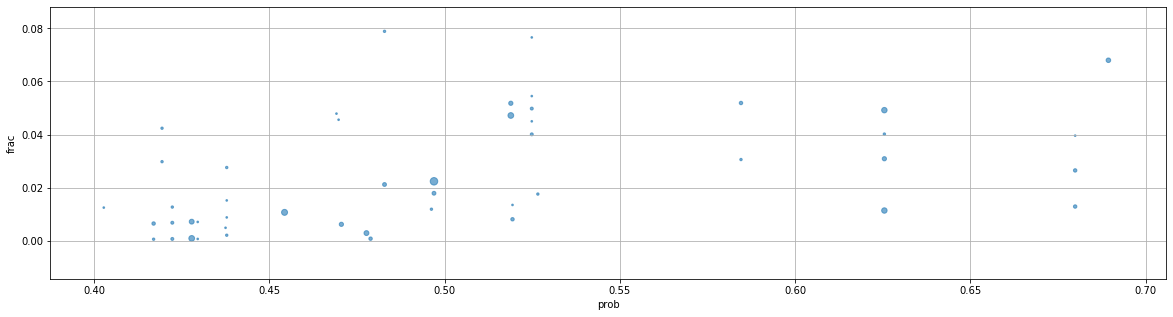

In [142]:
count = disp.groupby(by=['prob', 'frac']).count().level_4.rename('count').reset_index()
count.plot.scatter(x='prob', y='frac', s=count['count']*3, alpha=0.6, figsize=(20, 5), grid=True)
plt.show()

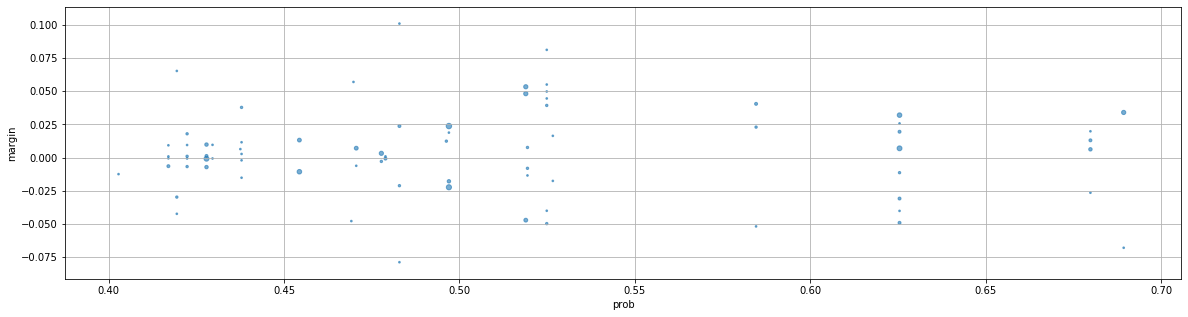

In [143]:
count = disp.groupby(by=['prob', 'margin']).count().level_4.rename('count').reset_index()
count.plot.scatter(x='prob', y='margin', s=count['count']*3, alpha=0.6, figsize=(20, 5), grid=True)
plt.show()

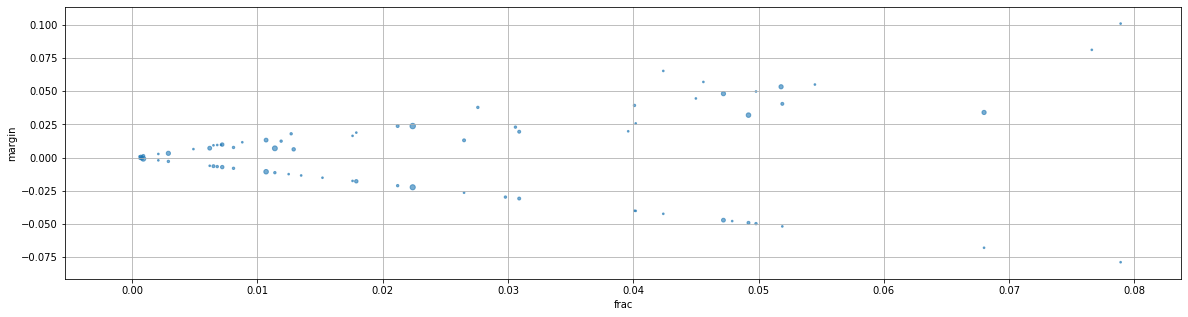

In [144]:
count = disp.groupby(by=['frac', 'margin']).count().level_4.rename('count').reset_index()
count.plot.scatter(x='frac', y='margin', s=count['count']*3, alpha=0.6, figsize=(20, 5), grid=True)
plt.show()

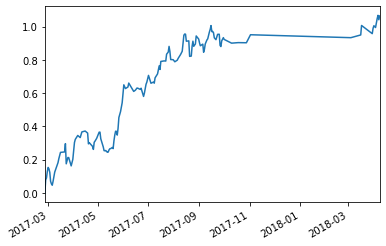

In [145]:
disp.margin.groupby(level=0).sum().cumsum().plot()